## Saulo César Beltrán Romero
## A00829482

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

## cargar datos

In [4]:
df = pd.read_csv(r'C:\Users\cesar\Downloads\personality.csv')
df = df.iloc[:,2:]
df.head()

,co,ex,ag,ne,wordcount,categoria
0,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,19.642258,48.530806,31.138871,7.305968,47.0645,4


## limpieza

In [5]:
df.isnull().sum()

co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

In [6]:
df.isnull().any()

co           False
ex           False
ag           False
ne           False
wordcount    False
categoria    False
dtype: bool

## normalizacion

In [7]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)

In [8]:
df_scale = pd.DataFrame(scale, columns= df.columns)
df_scale

,co,ex,ag,ne,wordcount,categoria
0,0.485725,0.565391,0.641501,0.383967,0.151175,0.750
1,0.303292,0.467902,0.478723,0.406663,0.347735,0.750
2,0.141023,0.493696,0.810161,0.340190,0.208518,0.375
3,0.180081,0.817966,0.696232,0.174393,0.355544,0.125
4,0.282146,0.725415,0.698045,0.273474,0.198168,0.375
...,...,...,...,...,...,...
135,0.341772,0.491386,0.713567,0.486791,0.200418,0.750
136,0.181027,0.725471,0.984439,0.467764,0.200515,0.375
137,0.110961,0.215837,0.312930,0.096379,0.326569,0.125
138,0.434531,0.432075,0.438089,0.272559,0.535391,0.000


## reduccion de dimensiones con PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA() #definir
pca.fit(df) #ajustar

PCA()

In [11]:
pca.explained_variance_

array([2017.26259127,   77.05235459,   28.04551161,   22.94524927,
          9.74682228,    4.69708543])

In [12]:
pca.explained_variance_ratio_

array([0.93402614, 0.03567652, 0.01298554, 0.01062403, 0.00451294,
       0.00217483])

In [13]:
pca_summary_df = pd.DataFrame({'Proporción de la varianza': pca.explained_variance_ratio_,
                               'Proporción acumulada': np.cumsum(pca.explained_variance_ratio_)})

In [14]:
pca_summary_df = pca_summary_df.transpose()
pca_summary_df

,0,1,2,3,4,5
Proporción de la varianza,0.934026,0.035677,0.012986,0.010624,0.004513,0.002175
Proporción acumulada,0.934026,0.969703,0.982688,0.993312,0.997825,1.000000


In [15]:
pca_summary_df.columns = ['PC' + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df

,PC1,PC2,PC3,PC4,PC5,PC6
Proporción de la varianza,0.934026,0.035677,0.012986,0.010624,0.004513,0.002175
Proporción acumulada,0.934026,0.969703,0.982688,0.993312,0.997825,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
components = np.arange(pca.n_components_) + 1
components

array([1, 2, 3, 4, 5, 6])

In [18]:
variance = pca.explained_variance_ratio_

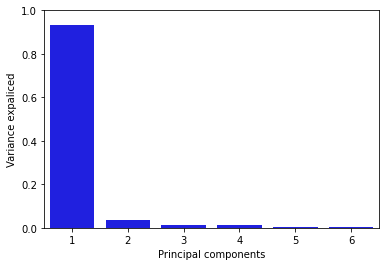

In [19]:
sns.barplot(x = components, y = variance, color = 'b')
plt.xlabel('Principal components')
plt.ylabel('Variance expaliced')
plt.ylim(0,1)
plt.show()

In [20]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns = pca_summary_df.columns, index = df.columns)

In [21]:
pca_components_df

,PC1,PC2,PC3,PC4,PC5,PC6
co,0.046322,0.363534,0.220712,-0.871188,-0.231619,0.066090
ex,-0.048866,-0.636689,-0.636071,-0.428241,0.013757,0.063819
ag,-0.067597,-0.671032,0.716029,-0.054853,-0.161828,0.057020
ne,0.009198,0.012966,0.149156,-0.138115,0.831338,0.517012
wordcount,0.995378,-0.094201,0.006399,0.015943,-0.004350,-0.005937
categoria,-0.005966,-0.056067,0.108231,-0.187889,0.478365,-0.849100


In [22]:
from sklearn import preprocessing

In [23]:
pca = PCA(n_components=2)
pca.fit(preprocessing.scale(df))

PCA(n_components=2)

In [24]:
pca.explained_variance_

array([2.2715148, 1.4198563])

In [25]:
pca.explained_variance_ratio_

array([0.37588161, 0.23495241])

In [26]:
pca_summary_df = pd.DataFrame({'Proporción de la varianza': pca.explained_variance_ratio_,
                               'Proporción acumulada': np.cumsum(pca.explained_variance_ratio_)})
                               
pca_summary_df = pca_summary_df.transpose()
pca_summary_df.columns = ['PC' + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]

pca_summary_df

,PC1,PC2
Proporción de la varianza,0.375882,0.234952
Proporción acumulada,0.375882,0.610834


In [27]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns = pca_summary_df.columns, index = df.columns)
pca_components_df

,PC1,PC2
co,0.484597,0.220979
ex,-0.506222,0.028878
ag,-0.529472,0.181087
ne,0.123438,0.666347
wordcount,0.437317,0.052849
categoria,-0.148596,0.686098


## k-means

<AxesSubplot:xlabel='co', ylabel='ne'>

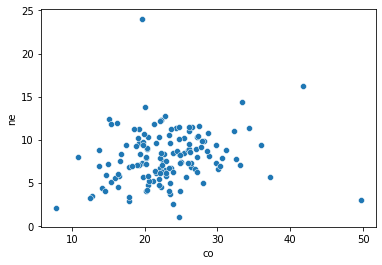

In [28]:
sns.scatterplot(x = 'co', y='ne', data = df)

## prueba con 2 clusters

In [29]:
km = KMeans(n_clusters=2)
km.fit_predict(df_scale)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0])

In [30]:
km.cluster_centers_

array([[0.36727855, 0.48658799, 0.33517529, 0.26652072, 0.48272059,
        0.11513158],
       [0.35563596, 0.59598018, 0.55402938, 0.3478982 , 0.39280815,
        0.69726562]])

In [31]:
df['Clusters'] = km.labels_
df.head()

,co,ex,ag,ne,wordcount,categoria,Clusters
0,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,20.525865,37.938947,24.279098,10.362406,78.7970,7,1
2,13.745417,38.999896,34.645521,8.836979,49.2604,4,1
3,15.377462,52.337538,31.082154,5.032231,80.4538,2,0
4,19.642258,48.530806,31.138871,7.305968,47.0645,4,1


<AxesSubplot:xlabel='co', ylabel='ne'>

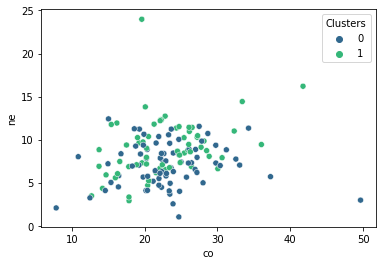

In [32]:
sns.scatterplot(x = 'co', y='ne', hue = 'Clusters', data = df, palette = 'viridis')

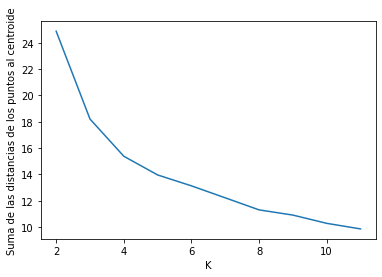

In [33]:
K = range(2,12)
inertias = []
for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scale)
  inertias.append(kmeans.inertia_)
plt.plot(K, inertias)
plt.xlabel('K')
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

## prueba con 3 clusters

In [34]:
km = KMeans(n_clusters=3)
km.fit_predict(df_scale)

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 0])

In [35]:
km.cluster_centers_

array([[0.24183774, 0.73059939, 0.75153559, 0.25512778, 0.27618064,
        0.30172414],
       [0.39666352, 0.54370093, 0.46029754, 0.37746526, 0.44348374,
        0.80163043],
       [0.39098545, 0.44501221, 0.27635359, 0.27321465, 0.51410763,
        0.11923077]])

In [36]:
df['Clusters'] = km.labels_
df.head()

,co,ex,ag,ne,wordcount,categoria,Clusters
0,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,20.525865,37.938947,24.279098,10.362406,78.7970,7,1
2,13.745417,38.999896,34.645521,8.836979,49.2604,4,0
3,15.377462,52.337538,31.082154,5.032231,80.4538,2,0
4,19.642258,48.530806,31.138871,7.305968,47.0645,4,0


<AxesSubplot:xlabel='co', ylabel='ne'>

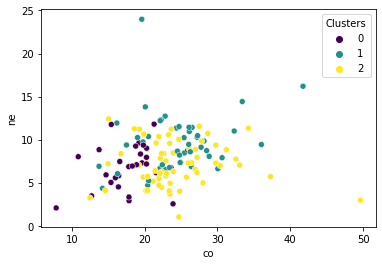

In [37]:
sns.scatterplot(x = 'co', y='ne', hue = 'Clusters', data = df, palette = 'viridis')

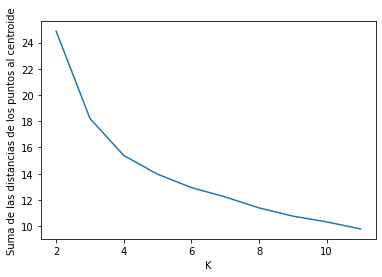

In [38]:
K = range(2,12)
inertias = []
for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scale)
  inertias.append(kmeans.inertia_)
plt.plot(K, inertias)
plt.xlabel('K')
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

## prueba con 4 clusters

In [39]:
km = KMeans(n_clusters=4)
km.fit_predict(df_scale)

array([1, 1, 3, 3, 3, 1, 1, 3, 2, 2, 0, 0, 0, 0, 2, 0, 3, 2, 0, 3, 3, 0,
       0, 1, 0, 0, 1, 0, 3, 0, 2, 0, 0, 2, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0,
       0, 0, 2, 0, 3, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 2, 3, 3, 1, 3, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 3, 2, 0, 0, 0, 3, 0, 0, 3, 1, 2, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 3, 1, 2, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 3, 0, 0, 3])

In [40]:
km.cluster_centers_

array([[0.39098545, 0.44501221, 0.27635359, 0.27321465, 0.51410763,
        0.11923077],
       [0.34038489, 0.58958646, 0.57860607, 0.31348808, 0.27899081,
        0.79464286],
       [0.46540328, 0.48694467, 0.3281218 , 0.45365625, 0.64967381,
        0.8       ],
       [0.23781385, 0.7389004 , 0.74832641, 0.25597468, 0.28163969,
        0.27314815]])

In [41]:
df['Clusters'] = km.labels_
df.head()

,co,ex,ag,ne,wordcount,categoria,Clusters
0,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,20.525865,37.938947,24.279098,10.362406,78.7970,7,1
2,13.745417,38.999896,34.645521,8.836979,49.2604,4,3
3,15.377462,52.337538,31.082154,5.032231,80.4538,2,3
4,19.642258,48.530806,31.138871,7.305968,47.0645,4,3


<AxesSubplot:xlabel='co', ylabel='ne'>

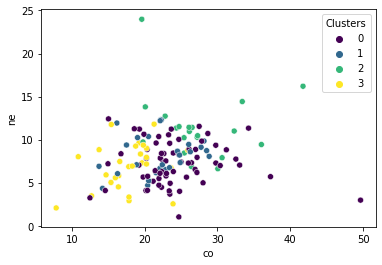

In [42]:
sns.scatterplot(x = 'co', y='ne', hue = 'Clusters', data = df, palette = 'viridis')

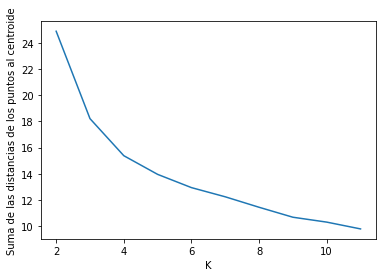

In [43]:
K = range(2,12)
inertias = []
for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scale)
  inertias.append(kmeans.inertia_)
plt.plot(K, inertias)
plt.xlabel('K')
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

## Prueba con 5 clusters

In [44]:
km = KMeans(n_clusters=5)
km.fit_predict(df_scale)

array([2, 2, 1, 1, 1, 2, 2, 1, 4, 4, 0, 0, 3, 3, 4, 0, 1, 4, 0, 1, 1, 3,
       0, 2, 0, 3, 2, 3, 1, 0, 4, 0, 0, 4, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3,
       0, 0, 4, 0, 1, 2, 0, 2, 2, 0, 2, 0, 3, 0, 4, 3, 4, 0, 0, 0, 2, 2,
       3, 3, 0, 1, 2, 4, 4, 0, 4, 0, 4, 1, 1, 2, 1, 0, 0, 3, 0, 2, 0, 0,
       0, 3, 0, 4, 3, 0, 3, 2, 2, 0, 1, 4, 3, 3, 0, 1, 3, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 4, 0, 4, 0, 1, 2, 4, 1, 1, 3, 0, 0, 2, 0, 0, 3, 3, 0,
       3, 4, 0, 2, 1, 0, 3, 1])

In [45]:
km.cluster_centers_

array([[0.38340127, 0.45954696, 0.23634091, 0.25531378, 0.42172568,
        0.1547619 ],
       [0.23781385, 0.7389004 , 0.74832641, 0.25597468, 0.28163969,
        0.27314815],
       [0.34369613, 0.58869844, 0.57012802, 0.31830589, 0.28191062,
        0.79310345],
       [0.40483481, 0.41847051, 0.34942023, 0.30590319, 0.68280508,
        0.05434783],
       [0.4669292 , 0.48289786, 0.32787861, 0.45368003, 0.66472689,
        0.80263158]])

In [46]:
df['Clusters'] = km.labels_
df.head()

,co,ex,ag,ne,wordcount,categoria,Clusters
0,28.148819,41.948819,29.370315,9.841575,37.0945,7,2
1,20.525865,37.938947,24.279098,10.362406,78.7970,7,2
2,13.745417,38.999896,34.645521,8.836979,49.2604,4,1
3,15.377462,52.337538,31.082154,5.032231,80.4538,2,1
4,19.642258,48.530806,31.138871,7.305968,47.0645,4,1


<AxesSubplot:xlabel='co', ylabel='ne'>

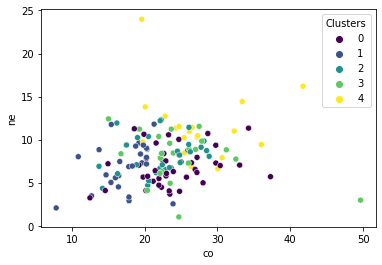

In [47]:
sns.scatterplot(x = 'co', y='ne', hue = 'Clusters', data = df, palette = 'viridis')

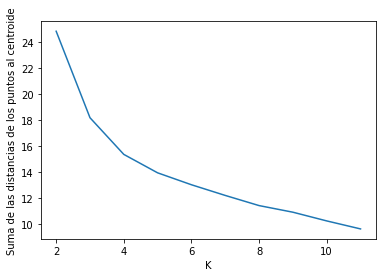

In [48]:
K = range(2,12)
inertias = []
for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scale)
  inertias.append(kmeans.inertia_)
plt.plot(K, inertias)
plt.xlabel('K')
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

## dendograma

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
linkage_data = linkage(df_scale, method='centroid', metric='euclidean')

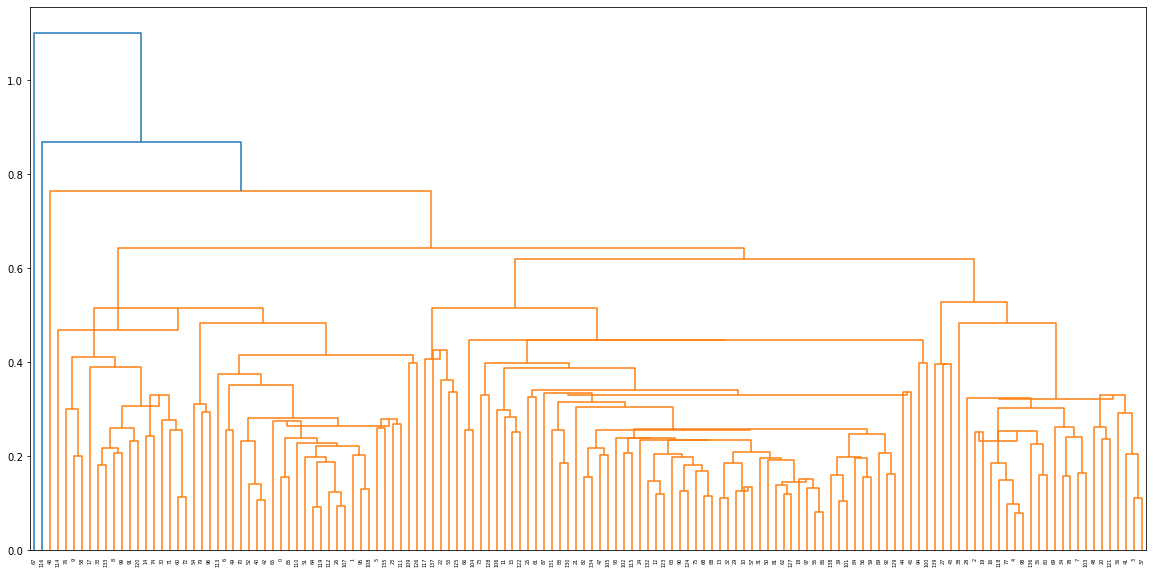

In [51]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

Basado en tu modelo responde las siguientes preguntas

    ¿Por qué es necesario normalizar los datos?

La normalización de los datos es necesaria para lograr que estos se encuentren en una misma escala, teniendo la misma forma, permitiendo así, que los datos no se sesguen y que las interpretaciones por realizar sean acertadas.

    ¿Cuántos componentes se usaron y qué variables tienen mayor importancia?

Después de realizar el análisis con PCA se decidió manejar 2 componentes según lo observado. Las variables que tienen un mayor nivel de importancia son 'co' y 'ne'.

    ¿Qué información da la gráfica "Elbow plot"?

Permite determinar cuántos clusters son necesarios para capturar la mayoría de la variación en los datos. En este caso nos permitió conocer que con 4 se lograba capturar la mayoría de los datos.

    ¿Crees que los resultados serían diferentes si descartas variables?

Depende de cuál variable sea descartada, ya que no todas presentan un nivel alto de significancia.

    Interpreta por lo menos 2 clusters explicando similitudes o diferencias de personalidad.

Como se puede observar dentro de la parte del análisis de K-means, se realizaron varias pruebas con distintas cantidades de clusters, en las cuales se presentan diferencias en los scatter plots, ya que dependiendo de la cantidad de clusters, el acomodo de los datos dentro de los mismos se veía afectado.
